### Import der Libraries

In [1]:
# Imports

import pandas as pd
import numpy as np

### Data loading

In [2]:
# data is in 00-data 
data_folder = "/Users/soenkedressler/Downloads/Text Analytics/HA_Text_Analytics/00-Data"

# file loading for dir
file_list = []
for root, dirs, filenames in os.walk(data_folder):
    for filename in filenames:
        if filename.endswith('.xlsx'):
            print(filename)
            file = pd.read_excel(os.path.join(root, filename))
            file_list.append(file)
df = pd.concat(file_list, axis=0, ignore_index=True)
print("*********************")

IndeedDaten_Gruppe4.xlsx
bereinigte_daten_gruppe_5.xlsx
data_indeed_schmidt_achim.xlsx
Data_G3-final.xlsx
analyst_gecrawled_unbereinigt.xlsx
Gruppe 1 Aufgabe 1 Lösung Loges.xlsx
*********************


In [3]:
#show df
df

,Titel,Unternehmen,Text,Firma,Beschreibung,Filename / Raw-Data,Jobtitel,Dateiname,Stellenbeschreibung,Stellendetails,Stellenbeschreibung o S,Job Description Phones,Job Description Emails,Stellendetails o S,Job Details Phones,Job Details Emails,Gruppe,Stellenbeschreibung optimiert,Stellendetails optimiert
0,Business Analyst (m/w/d) im Bereich Kredit-/Ri...,BRUDERKOPF GmbH & Co. KG,BRUDERKOPF ist der vertrauensvolle und unabhän...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,(Junior) Business Analyst für Digitalisierung ...,SKS Unternehmensberatung,Die SKS Group – bestehend aus der SKS Unterneh...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Business Analyst (m/w/d),Netempire Software GmbH,Business Analyst (m/w/d) Schwerpunkt Digitalis...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Data Analyst Wholesale Service & Order Managem...,Deutsche Glasfaser Holding,"Du liebst es, Menschen zu verbinden. Tiefergeh...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Praktikant:in Customer Insights / Data Analyst...,celebrate company GmbH,Worum geht's? New Work Pioniere und außergewöh...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1423,NaN,NaN,NaN,Unite von Jobs-Daheim.de\nFrankfurt am Main\nH...,NaN,NaN,Referent im Vertrieb / Sales Controlling (m/w/...,9.html,Stellenbeschreibung\nAnstellungsart\nVollzeit\...,Das sind wir\nWir bei Unite von Jobs-Daheim.de...,Stellenbeschreibung Anstellungsart Vollzeit Ho...,NaN,NaN,Unite Jobs-Daheim.de vernetzen Wirtschaft nach...,NaN,NaN,Gruppe 5,stellenbeschreib anstellungsart vollzeit homeo...,unit jobs-daheim.d vernetz wirtschaft nachhalt...
1424,NaN,NaN,NaN,VTG\n20097 Hamburg,NaN,NaN,IT Controller (m/w/d),12.html,Stellenbeschreibung\nAnstellungsart\nFestanste...,Deine Aufgaben:\nAls IT Controller:in gestalte...,Stellenbeschreibung Anstellungsart Festanstellung,NaN,NaN,Aufgaben : IT Controller : gestaltest verantwo...,34 20097,NaN,Gruppe 5,stellenbeschreib anstellungsart festanstell,aufgab it controll gestalt verantwort ak- tiv ...
1425,NaN,NaN,NaN,Volz Consulting GmbH\nPforzheim,NaN,NaN,Key Account Manager (m/w/d),6.html,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gruppe 5,NaN,NaN
1426,NaN,NaN,NaN,econ solutions GmbH\nMünchen,NaN,NaN,Product Owner Energiemanagementsoftware (m|w|d),22.html,Stellenbeschreibung\nAnstellungsart\nFestanste...,"Deine Aufgaben:\nPlanung des Leistungsumfangs,...",Stellenbeschreibung Anstellungsart Festanstellung,NaN,NaN,"Aufgaben : Planung Leistungsumfangs , technisc...",49 621 290,NaN,Gruppe 2,stellenbeschreib anstellungsart festanstell,aufgab planung leistungsumfang technisch archi...


In [4]:
# load all files individually
path="/Users/soenkedressler/Downloads/Text Analytics/HA_Text_Analytics/00-Data/"
df_1=pd.read_excel(path+"bereinigte_daten_gruppe_5.xlsx")
df_2=pd.read_excel(path+"Gruppe 1 Aufgabe 1 Lösung Loges.xlsx")
df_3=pd.read_excel(path+"analyst_gecrawled_unbereinigt.xlsx")
df_4=pd.read_excel(path+"data_indeed_schmidt_achim.xlsx")
df_5=pd.read_excel(path+"IndeedDaten_Gruppe4.xlsx")
df_6=pd.read_excel(path+"Data_G3-final.xlsx")
# data handling 
df_2=df_2.rename(columns={"Jobtitel":"Titel", "Firma":"Unternehmen", "Stellenbeschreibung":"Text"})
df_3=df_3.rename(columns={"Jobtitel":"Titel"})
df_4=df_4.rename(columns={"Jobtitel":"Titel", "Firma":"Unternehmen", "Beschreibung":"Text"})
df_2=df_2.filter(['Titel', 'Unternehmen', 'Text'])
df_4=df_4.filter(['Titel', 'Unternehmen', 'Text'])
# concat
df_list=[df_1,df_2,df_3,df_4,df_5,df_6]
df=pd.concat(df_list)
print("number of entries:", str(len(df)))
print("number of entries:", str(df.Text.nunique()))

number of entries: 1428
number of entries: 1336


### Explorative Analysis and Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1428 entries, 0 to 99
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unternehmen  1428 non-null   object
 1   Titel        1428 non-null   object
 2   Text         1418 non-null   object
dtypes: object(3)
memory usage: 44.6+ KB


In [6]:
print(df.isna().sum())
df=df.dropna()
print(df.isna().sum())
# drop duplicates
df=df.drop_duplicates()
df=df.drop_duplicates(subset="Text")

Unternehmen     0
Titel           0
Text           10
dtype: int64
Unternehmen    0
Titel          0
Text           0
dtype: int64


In [7]:
df.Text=df.Text.astype(str)
df["length"]=[len(i) for i in df["Text"]]

         count         mean          std   min      25%     50%     75%  \
length  1336.0  3182.355539  1274.545631  22.0  2343.25  3056.0  3827.0   

            max  
length  11419.0  


<AxesSubplot:>

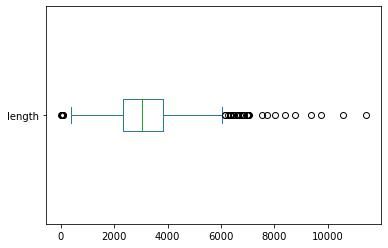

In [8]:
print(df.describe().T)
df['length'].plot(kind='box', vert=False) 

In [9]:
df_max=df.sort_values(by="length", ascending=False)
df_max.head(40)

,Unternehmen,Titel,Text,length
54,Barclays,Europe KYC Relationship Management Analyst,Europe KYC Relationship Management Analyst Fra...,11419
305,Deutsche Bank,DWS - AFC & Compliance Analyst: Marketing Revi...,Position Overview (English version below) Üb...,10551
96,Deutsche Bank,Rating Analyst & Credit Officer (m/f/x) Global...,Description of the business area\nOne of the k...,9755
327,Deutsche Bank,DWS - Investment Guideline Management - Analys...,Position Overview About DWS DWS Group (DWS) w...,9381
313,Deutsche Bank,DWS - Senior Operations Analyst Claims (m/w/d),Position Overview Über die DWS Die DWS Group...,8766
210,eBay Inc.,Business Systems Analyst,Über eBay Wir stärken Menschen und schaffen wi...,8385
405,diva-e Digital Value Excellence GmbH,Senior Consultant Specialist Adobe Analytics (...,Arbeitgeber Du hast Erfahrung beim Identifizie...,8038
455,Mercedes-Benz Group AG,Data Analyst (w/m/d) im Einkauf,Aufgaben Ist IT für Dich mehr als nur eine Abk...,7714
358,Teva Pharmaceuticals,QA Analyst Schwerpunkt Mikrobiologie und Umgeb...,\n \n \n \n Wer sind wir \n \n \n Wir wollen ...,7534
489,Deutsche Bank,Mobile Analytics/Monitoring Specialist - Digit...,Position Overview ***English version below***...,7047


         count         mean          std    min     25%     50%      75%  \
length  1292.0  3108.890093  1056.642504  369.0  2345.5  3021.0  3776.75   

           max  
length  6026.0  


<AxesSubplot:>

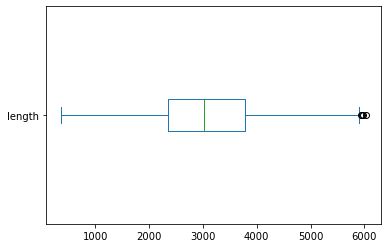

In [10]:
# Calculate the boundaries of the boxplot using numpy
q1 = np.percentile(df['length'], 25)
q3 = np.percentile(df['length'], 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Filter the DataFrame using boolean indexing
df = df[(df['length'] >= lower_bound) & (df['length'] <= upper_bound)]

print(df.describe().T)
df['length'].plot(kind='box', vert=False)

<AxesSubplot:ylabel='Frequency'>

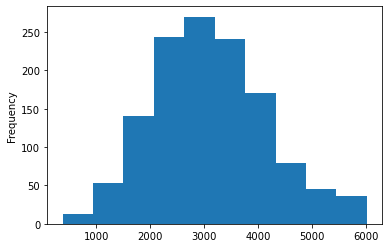

In [11]:
df['length'].plot(kind='hist')

In [12]:
print(df.describe(include="O").T)

            count unique                                                top  \
Unternehmen  1292    802                                       freelance.de   
Titel        1292   1001                               Data Analyst (m/w/d)   
Text         1292   1292  Stellenbeschreibung Anstellungsart Vollzeit Vo...   

            freq  
Unternehmen   16  
Titel         20  
Text           1  


In [13]:
junior=[]
senior=[]
for i in df.Titel:
    if "junior" in str(i).lower():
        junior.append(1)
    elif "senior" in str(i).lower():
        senior.append(1)
print(len(junior))
print(len(senior))

python=[]
for i in df.Text:
    if "python" in str(i).lower():
        python.append(1)

print(len(python))

123
96
175


['das', 'würden', 'dieselben', 'mich', 'anderm', 'indem', 'zu', 'nun', 'war', 'ihre']


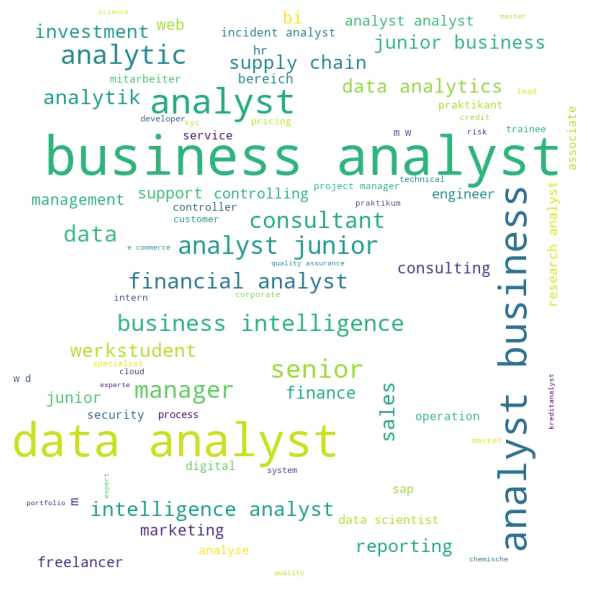

In [14]:
# wordcloud Titel
import nltk
from nltk import word_tokenize
from nltk.stem.porter import PorterStemmer
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

stopwords = list(nltk.corpus.stopwords.words('german'))
#stopwords=[str(i).upper() for i in stopwords]
stopwords = set(stopwords)
print(list(stopwords)[0:10])

def tokenize(text):
    tokens = word_tokenize(text)
    stems = []
    stems_no_stop=[]
    #for item in tokens: 
    #    stems.append(PorterStemmer().stem(item))
    for item in tokens:
        if item not in stopwords:
            stems_no_stop.append(item)
    return stems_no_stop
text = ["-".join(tokenize(txt.lower().split("(")[0])) for txt in df.Titel]
text = ' '.join(text)

#text = ' '.join(text)
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(text)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

['das', 'würden', 'dieselben', 'mich', 'anderm', 'indem', 'zu', 'nun', 'war', 'ihre']


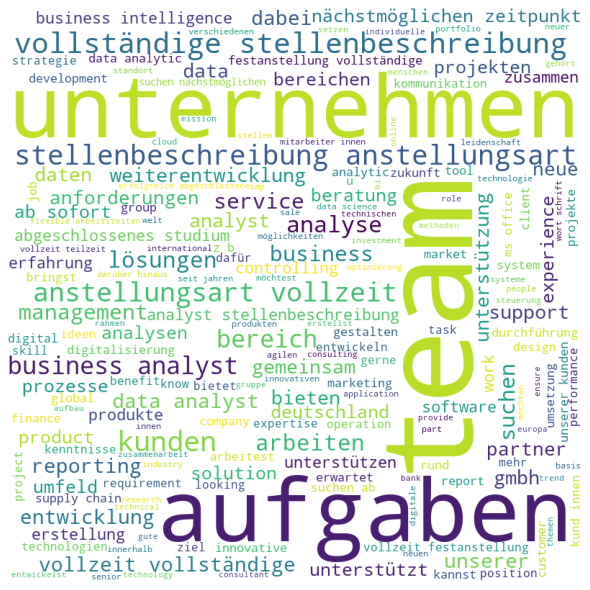

In [15]:
# wordcloud Text
import nltk
from nltk import word_tokenize
from nltk.stem.porter import PorterStemmer
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import regex as re 

stopwords_de = list(nltk.corpus.stopwords.words('german'))
#stopwords=[str(i).upper() for i in stopwords]
stopwords_de = set(stopwords_de)
stopwords_de|={"sowie"}
print(list(stopwords)[0:10])

stopwords_eng = list(nltk.corpus.stopwords.words('english'))
#stopwords=[str(i).upper() for i in stopwords]
stopwords_eng = set(stopwords_eng)
stopwords_eng

def tokenize(text):
    tokens = word_tokenize(text)
    stems = []
    stems_no_stop=[]
    #for item in tokens: 
    #    stems.append(PorterStemmer().stem(item))
    for item in tokens:
        if item not in stopwords_de:
            if item not in stopwords_eng:
                if re.findall(r'[\w]*\p{L}{1}[\w!]*', item)!=[] and len(item)>1:
                    stems_no_stop.append(item)
    return stems_no_stop
text = [" ".join(tokenize(txt.lower().split("(")[0])) for txt in df.Text]
text = ' '.join(text)

wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(text)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [16]:
def tokenize(text):
    return re.findall(r'[\w]*\p{L}{1}[\w!]*', text) 
tokens_list=[tokenize(text) for text in df.Text]
print(tokens_list[0])
#text = ' '.join(text)

['Stellenbeschreibung', 'Anstellungsart', 'Vollzeit', 'Vollständige', 'Stellenbeschreibung', 'Unser', 'Stellenangebot', 'Die', 'Volkswagen', 'Group', 'Services', 'GmbH', 'ist', 'der', 'Dienstleistungsanbieter', 'innerhalb', 'des', 'Volkswagen', 'Konzerns', 'Wir', 'bieten', 'abwechslungsreiche', 'Projekterfahrungen', 'beim', 'größten', 'Automobilhersteller', 'der', 'Welt', 'internationale', 'und', 'strategische', 'Business', 'Intelligence', 'Projekte', 'innovative', 'Arbeitsmethoden', 'und', 'umfassende', 'Fortbildungsmöglichkeiten', 'Unser', 'Aufgabenbereich', 'ist', 'die', 'Analyse', 'der', 'Systeme', 'im', 'gesamten', 'Einkauf', 'des', 'Volkswagen', 'Konzerns', 'Zudem', 'unterstützen', 'wir', 'weitere', 'Bereiche', 'bei', 'ihren', 'Business', 'Intelligence', 'Analysen', 'In', 'all', 'unseren', 'Projekten', 'nutzen', 'wir', 'dabei', 'Data', 'Analytics', 'Tools', 'wie', 'SQL', 'Python', 'etc', 'Unser', 'Team', 'im', 'Bereich', 'Business', 'Intelligence', 'sucht', 'Unterstützung', 'durc

In [17]:
for i in ["1","word", "x"]:
    if re.findall(r'[\w]*\p{L}{1}[\w!]*', i)!=[] and len(i)>1:
        print(i)

word


In [18]:
np.random.random((16,16))

array([[0.46713407, 0.85653951, 0.00976778, 0.12523327, 0.7806903 ,
        0.62139719, 0.17101859, 0.71109972, 0.09468956, 0.08345431,
        0.36080755, 0.89257133, 0.87895767, 0.51885185, 0.57338521,
        0.34303322],
       [0.98961457, 0.32078817, 0.20234132, 0.63997245, 0.08312815,
        0.14454519, 0.02852186, 0.34738046, 0.44828115, 0.09302443,
        0.36708645, 0.85090537, 0.05792032, 0.38157375, 0.50267729,
        0.07027765],
       [0.35933738, 0.09027156, 0.55599756, 0.89087079, 0.12554797,
        0.13838056, 0.50919873, 0.84947652, 0.50666421, 0.69986934,
        0.38268134, 0.69111538, 0.78852709, 0.75551022, 0.45644592,
        0.78779239],
       [0.8792712 , 0.27970742, 0.50628808, 0.56301619, 0.25611777,
        0.21190381, 0.21374733, 0.37621063, 0.51970443, 0.49770624,
        0.70422202, 0.61507664, 0.96996325, 0.64091777, 0.02778852,
        0.54156397],
       [0.79772063, 0.23257497, 0.66098244, 0.26492235, 0.49660538,
        0.38509302, 0.50641766, 

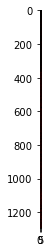

In [19]:
import matplotlib.pyplot as plt
import numpy as np

text_heat=[]
for text in df.Text:
    x=tokenize(text.lower().split("(")[0]) 
    for i in x:
        text_heat.append(i)
text_heat=list(dict.fromkeys(text_heat))
text_heat_index=[text_heat.index(i) for i in text_heat]
text_heat_dict={key: value for key,value in zip(text_heat, text_heat_index)}

text_index=[]
for text in df.Text:
    x=tokenize(text.lower().split("(")[0])
    x=[float(text_heat_dict[i]) for i in x][:10]
    text_index.append(x)
#text_index=np.matrix(text_index, dtype="object")# dtype=object
text_index=pd.DataFrame(text_index).fillna(0)
text_index
plt.imshow(text_index, cmap="hot")


                           unique_values  counts
0                   Data Analyst (m/w/d)      20
1               Business Analyst (m/w/d)      19
2              Business Analyst (m/w/d)       13
3                  Data Analyst (m/w/d)       10
4  Business Intelligence Analyst (m/w/d)       8


<AxesSubplot:xlabel='X_value', ylabel='Y_value'>

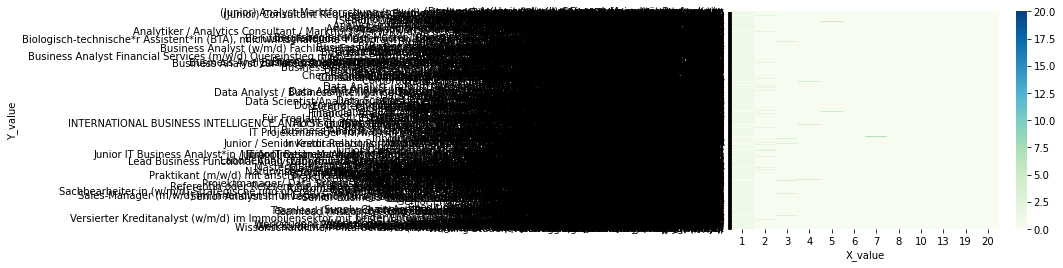

In [20]:
import seaborn as sns

q=df.Titel.value_counts().rename_axis('unique_values').reset_index(name='counts')
print(q.head())
q["X_value"]=q["counts"]
q=q.rename(columns={"counts":"Z_value", "unique_values":"Y_value"})
q
pivotted= q.pivot('Y_value','X_value','Z_value').fillna(0)
q.sort_index(level=0, ascending=True, inplace=True)
pivotted
sns.heatmap(pivotted,cmap='GnBu', xticklabels=True, yticklabels=True)

#ax = sns.heatmap(pivotted, annot=True, linewidths=0.4, cmap="YlOrRd")

In [58]:
# cosinus 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

cv=CountVectorizer()
cv.fit([str(i) for i in df.Text[:100]])

CountVectorizer(input='content', encoding='utf-8', decode_error='strict', strip_accents=None, lowercase=True, preprocessor=None, tokenizer=None, stop_words=None, token_pattern='(?u)\b\w\w+\b', ngram_range=(1, 1), analyzer='word', max_df=1.0, min_df=1, max_features=None, vocabulary=None, binary=False)
print(cv.get_feature_names()[-10:])

dt=cv.transform([str(i) for i in df.Text[:100]])

print(cosine_similarity(dt[0], dt[0]))

#dt=dt.toarray()
#pd.DataFrame(dt.toarray(), columns=cv.get_feature_names())

cos_sim=pd.DataFrame(cosine_similarity(dt, dt))
print(cos_sim)

['überzeugend', 'überzeugende', 'überzeugenden', 'überzeugendes', 'überzeugst', 'überzeugt', 'überzeugung', 'überzeugungskraft', 'übrigens', 'škoda']
[[1.]]
          0         1         2         3         4         5         6   \
0   1.000000  0.641097  0.689151  0.606880  0.553565  0.537598  0.563738   
1   0.641097  1.000000  0.725226  0.605398  0.630848  0.610896  0.603830   
2   0.689151  0.725226  1.000000  0.657870  0.589731  0.595746  0.604709   
3   0.606880  0.605398  0.657870  1.000000  0.506363  0.557906  0.565622   
4   0.553565  0.630848  0.589731  0.506363  1.000000  0.726869  0.586819   
..       ...       ...       ...       ...       ...       ...       ...   
95  0.434588  0.408383  0.476797  0.422144  0.501589  0.425295  0.570985   
96  0.670176  0.716348  0.767932  0.640653  0.635642  0.652254  0.658513   
97  0.346138  0.405907  0.386356  0.353391  0.344741  0.335406  0.428170   
98  0.406934  0.437934  0.444759  0.378471  0.458701  0.420001  0.489908   
99  0.5

/Users/soenkedressler/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [66]:
print(df.Text.iloc[92])


 
 
 
   Wir bei Sanacorp gestalten die Zukunft der Apotheken aktiv mit – als Genossenschaft verwurzelt in Tradition und voller Energie für morgen. Mit rund 3.000 Beschäftigten in 19 Niederlassungen sorgen wir dafür, dass mehr als 8.000 Apotheken im gesamten Bundesgebiet rund um die Uhr sicher und zuverlässig mit Arzneimitteln und Gesundheitsprodukten beliefert werden. Wir arbeiten stets an neuen Entwicklungen und innovativen Lösungen rund um Logistik, Digitalisierung und Nachhaltigkeit - für uns und die Apotheken. Klingt spannend? Wir erwarten Dich – mit vielseitigen Aufgaben, engagierten Kollegen, hoher sozialer Verantwortung und einem gemeinsamen Ziel - mutig und tatkräftig, mit Optimismus und Leidenschaft.
    
  Auf der Suche nach neuen Herausforderungen? Machen Sie mit uns den nächsten beruflichen Schritt und bewerben Sie sich jetzt als IT Business Analyst (m/w/d) "Einkauf und Versandlogistik" für den Standort Planegg bei München.
   
 
 
 Was Dich erwartet: 
 
 
 Als Spezialist

In [67]:
print(df.Text.iloc[96])

Stellenbeschreibung Anstellungsart Vollzeit Teilzeit Vollständige Stellenbeschreibung 
 
 
 Vantage Towers ist eine der führenden Tower Companies in Europa. Unsere Infrastruktur und Technologien tragen dazu bei, Menschen, Unternehmen und Geräte wie nie zuvor miteinander zu verbinden. Wir kombinieren die Größe, Stabilität und Qualität unseres führenden Tower-Netzwerks mit der Agilität, dem Optimismus und der Energie eines Start-ups. Wir sind inspiriert von unseren Erfolgen in der Vergangenheit und begeistert von den Möglichkeiten, die sich in der Zukunft bieten. Werde Teil unserer Reise und treibe gemeinsam mit uns ein nachhaltig vernetztes Europa voran.     Manager Infrastructure Operations Analyst & Reporting (m/w/d) für Vantage Towers    Verfügst Du über ausgezeichnete Kommunikations- und Informationsfähigkeiten? Bist Du offen für Netzwerke in einem internationalen Umfeld? Dann werde Teil unseres Teams als Manager Infrastructure Operations Analyst & Reporting (m/f/d). In Deiner Rolle

### TF-IDF

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from nltk import word_tokenize
from nltk.stem.porter import PorterStemmer
 
def tokenize(text):
    tokens = word_tokenize(text)
    stems = []
    for item in tokens: stems.append(PorterStemmer().stem(item))
    return stems
 
text_orig = df.Titel
 
# word tokenize and stem
# text = text_orig
text = [" ".join(tokenize(txt.lower())) for txt in text_orig]
vectorizer = CountVectorizer()
# vectorizer = TfidfVectorizer(smooth_idf=False)
matrix = vectorizer.fit_transform(text).todense()
 
# transform the matrix to a pandas df
matrix = pd.DataFrame(matrix, columns=vectorizer.get_feature_names())
#print(matrix)
 
# sum over each document (axis=0)
top_words = matrix.sum(axis=0).sort_values(ascending=False)
print(top_words)

analyst                997
busi                   406
data                   339
analyt                 130
junior                 124
                      ... 
deu                      1
messmethod               1
desktop                  1
methodenentwicklung      1
kampagnenanalys          1
Length: 998, dtype: int64


/Users/soenkedressler/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import word_tokenize
from nltk.stem.porter import PorterStemmer
 
def tokenize(text):
    tokens = word_tokenize(text)
    stems = []
    for item in tokens: stems.append(PorterStemmer().stem(item))
    return stems
 
text_orig = df.Titel
 
# word tokenize and stem
# text = text_orig
text = [" ".join(tokenize(txt.lower())) for txt in text_orig]
vectorizer = TfidfVectorizer()
# vectorizer = TfidfVectorizer(smooth_idf=False)
matrix = vectorizer.fit_transform(text).todense()
 
# transform the matrix to a pandas df
matrix = pd.DataFrame(matrix, columns=vectorizer.get_feature_names())
#print(matrix)
 
# sum over each document (axis=0)
top_words = matrix.sum(axis=0).sort_values(ascending=False)
print(top_words)

analyst     196.942941
busi        148.134464
data        132.499995
junior       54.073161
senior       44.236726
               ...    
versiert      0.286139
92            0.286139
zu            0.286139
61831502      0.286139
eur           0.286139
Length: 1043, dtype: float64


/Users/soenkedressler/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
import re
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

# create a list of documents

# initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# define a function to preprocess the text
def preprocess_text(text):
    # remove email addresses
    text = re.sub(r'\S+@\S+', '', text)
    # remove phone numbers
    text = re.sub(r'\d{3}-\d{3}-\d{4}|\+\d{1}-\d{3}-\d{3}-\d{4}', '', text)
    # remove dates (in the format MM/DD/YYYY)
    text = re.sub(r'\d{2}/\d{2}/\d{4}', '', text)
    # tokenize the text into words
    words = nltk.word_tokenize(text)
    # lemmatize each word and join the results into a string
    words_lemmatized = [lemmatizer.lemmatize(word) for word in words]
    return " ".join(words_lemmatized)

# preprocess each document
documents_preprocessed = [preprocess_text(doc) for doc in df.Text]

# create a TfidfVectorizer object
vectorizer = TfidfVectorizer()

# fit and transform the preprocessed documents into a sparse matrix of TF-IDF features
X = vectorizer.fit_transform(documents_preprocessed)

# get the feature names (i.e., words)
feature_names = vectorizer.get_feature_names()


matrix = vectorizer.fit_transform(text).todense()
matrix = pd.DataFrame(matrix, columns=vectorizer.get_feature_names())
#print(matrix)
 
# sum over each document (axis=0)
top_words = matrix.sum(axis=0).sort_values(ascending=False)
print(top_words)

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/soenkedressler/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/soenkedressler/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


gmbh          106.495058
ag             40.904067
group          30.475858
co             23.694778
kg             22.807147
                 ...    
inner           0.331999
pathologi       0.331999
medizin         0.331999
zytologi        0.331999
gynäkologi      0.331999
Length: 1173, dtype: float64


/Users/soenkedressler/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# create a list of lists to store the TF-IDF scores and corresponding words
tfidf_scores = [[] for _ in range(len(df.Text))]
tfidf_words = [[] for _ in range(len(df.Text))]

# loop over the documents and extract the TF-IDF scores and words
for i, doc in enumerate(documents_preprocessed):
    # tokenize the document
    words = nltk.word_tokenize(doc)
    # get the indices and TF-IDF scores for the words in the document
    indices = [feature_names.index(word) for word in words if word in feature_names]
    scores = [X[i, j] for j in indices]
    # sort the words by decreasing TF-IDF score
    sorted_indices = sorted(range(len(scores)), key=lambda k: scores[k], reverse=True)
    # store the top 10 words and their TF-IDF scores
    for j in sorted_indices[:10]:
        tfidf_scores[i].append(scores[j])
        tfidf_words[i].append(feature_names[indices[j]])

# print the top 10 words and their TF-IDF scores for each document
for i, doc in enumerate(df.Text):
    print("Document {}: {}".format(i+1, doc))
    for j in range(min(10, len(tfidf_words[i]))):
        print("{}\t{}".format(tfidf_words[i][j], tfidf_scores[i][j]))
    print()


KeyboardInterrupt: 